In [ ]:
conda install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as data
from datetime import date
from pandas_datareader import data,wb
import sklearn
import tensorflow as tf
import tensorflow 
from tensorflow import keras

C:\Users\Chestha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime(date.today())

In [59]:
df = data.DataReader("AAPL", 'stooq', start, end)

In [60]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-04,185.520,187.38,181.9200,181.990,115956841.0
2023-08-03,191.570,192.37,190.6900,191.170,62243282.0
2023-08-02,195.040,195.18,191.8507,192.580,50389327.0
2023-08-01,196.235,196.73,195.2800,195.605,35281426.0
2023-07-31,196.060,196.49,195.2600,196.450,38824113.0


In [61]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [6]:
df = df.reset_index()

In [7]:
df

,Date,Open,High,Low,Close,Volume
0,2023-08-04,185.52000,187.38000,181.92000,181.99000,1.159568e+08
1,2023-08-03,191.57000,192.37000,190.69000,191.17000,6.224328e+07
2,2023-08-02,195.04000,195.18000,191.85070,192.58000,5.038933e+07
3,2023-08-01,196.23500,196.73000,195.28000,195.60500,3.528143e+07
4,2023-07-31,196.06000,196.49000,195.26000,196.45000,3.882411e+07
...,...,...,...,...,...,...
3415,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
3416,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
3417,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3418,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08


In [8]:
df= df.drop(['Date'], axis=1)

In [9]:
df

,Open,High,Low,Close,Volume
0,185.52000,187.38000,181.92000,181.99000,1.159568e+08
1,191.57000,192.37000,190.69000,191.17000,6.224328e+07
2,195.04000,195.18000,191.85070,192.58000,5.038933e+07
3,196.23500,196.73000,195.28000,195.60500,3.528143e+07
4,196.06000,196.49000,195.26000,196.45000,3.882411e+07
...,...,...,...,...,...
3415,6.40586,6.45421,6.36458,6.45401,5.246856e+08
3416,6.44444,6.45421,6.36409,6.41085,5.588893e+08
3417,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3418,6.53905,6.56358,6.49230,6.52639,7.055130e+08


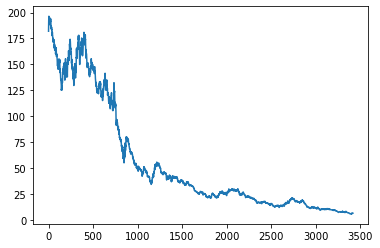

In [10]:
plt.plot(df.Close)

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3415    6.953343
3416    6.937091
3417    6.921914
3418    6.908978
3419    6.897006
Name: Close, Length: 3420, dtype: float64

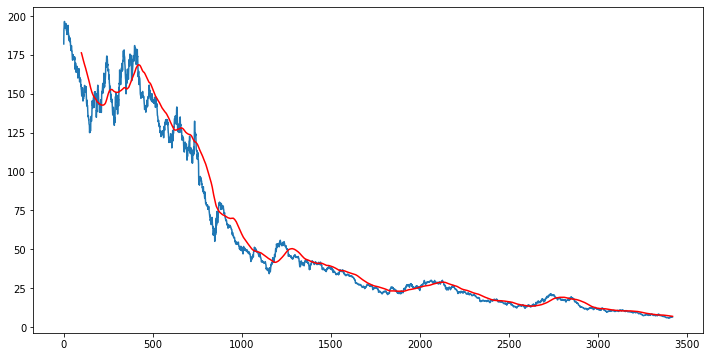

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3415    7.532251
3416    7.517503
3417    7.502498
3418    7.487859
3419    7.473319
Name: Close, Length: 3420, dtype: float64

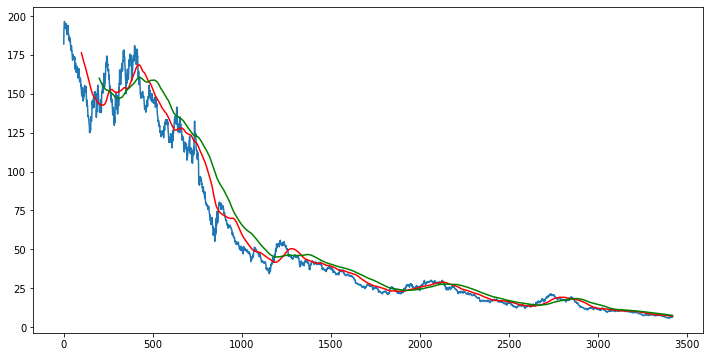

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(3420, 5)

In [16]:
#splitting data into training and testing 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):len(df)])

In [17]:
print(data_training.shape)
print(data_testing.shape)

(2394, 1)
(1026, 1)


In [18]:
data_training.head()

,Close
0,181.990
1,191.170
2,192.580
3,195.605
4,196.450


In [19]:
data_training.tail()

,Close
2389,16.2325
2390,16.1387
2391,16.0181
2392,15.7908
2393,15.7610


In [20]:
data_testing.head()

,Close
2394,15.7360
2395,15.7669
2396,15.9483
2397,17.3331
2398,17.1936


In [21]:
data_testing.tail()

,Close
3415,6.45401
3416,6.41085
3417,6.42221
3418,6.52639
3419,6.51522


In [22]:
#scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[9.19972992e-01],
       [9.70778520e-01],
       [9.78581983e-01],
       ...,
       [1.42288684e-03],
       [1.64924262e-04],
       [0.00000000e+00]])

In [24]:
data_training_array.shape

(2394, 1)

In [25]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train) , np.array(y_train)

In [26]:
x_train.shape

(2294, 100, 1)

In [27]:
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential


In [30]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True, activation = 'relu', ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
72/72 [==============================] - 23s 244ms/step - loss: 0.0260
Epoch 2/50
72/72 [==============================] - 19s 270ms/step - loss: 0.0053
Epoch 3/50
72/72 [==============================] - 19s 266ms/step - loss: 0.0052
Epoch 4/50
72/72 [==============================] - 18s 249ms/step - loss: 0.0056
Epoch 5/50
72/72 [==============================] - 17s 234ms/step - loss: 0.0049
Epoch 6/50
72/72 [==============================] - 19s 263ms/step - loss: 0.0037
Epoch 7/50
72/72 [==============================] - 19s 266ms/step - loss: 0.0047
Epoch 8/50
72/72 [==============================] - 18s 247ms/step - loss: 0.0038
Epoch 9/50
72/72 [==============================] - 20s 272ms/step - loss: 0.0036
Epoch 10/50
72/72 [==============================] - 14s 200ms/step - loss: 0.0034
Epoch 11/50
72/72 [==============================] - 14s 196ms/step - loss: 0.0034
Epoch 12/50
72/72 [==============================] - 14s 194ms/step - loss: 0.0035
Epoch 13/50
7

In [62]:
model.save('keras_model.h5')


C:\Users\Chestha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
past100days = data_training.tail(100)

In [35]:
final_df = past100days.append(data_testing, ignore_index=True)

In [36]:
final_df.head()

,Close
0,20.1286
1,20.2492
2,20.2682
3,20.4805
4,20.5533


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.91434716],
       [0.92206801],
       [0.9232844 ],
       ...,
       [0.03685908],
       [0.04352873],
       [0.04281362]])

In [38]:
input_data.shape

(1126, 1)

In [39]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1026, 100, 1)
(1026,)


In [41]:
y_predicted = model.predict(x_test)

33/33 [==============================] - 3s 57ms/step


In [42]:
y_predicted.shape

(1026, 1)

In [43]:
scaler.scale_

array([0.06402036])

In [44]:
y_predicted 

array([[0.6350035 ],
       [0.6235392 ],
       [0.6128457 ],
       ...,
       [0.09456791],
       [0.09564476],
       [0.0967005 ]], dtype=float32)

In [45]:
y_test

array([0.63313131, 0.63510954, 0.64672283, ..., 0.03685908, 0.04352873,
       0.04281362])

In [46]:
y_test.shape

(1026,)

In [47]:
scale_factor = 1/0.06402036

In [48]:
y_predicted = y_predicted*scale_factor

In [49]:
y_test = y_test*scale_factor

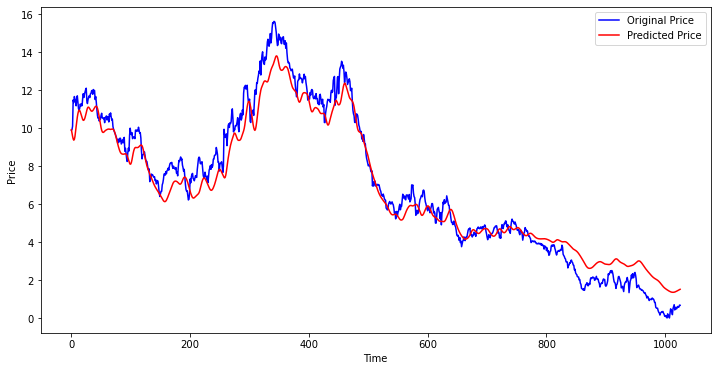

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price') 
plt.legend()
plt.show()